In [1]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#from ipywidgets import *
import numpy as np
import sys

In [2]:
from taurex.mixin import enhance_class
from taurex_catalogue import PlanetCatalogueFile
from taurex_catalogue import StarCatalogueFile
from taurex.planet import Planet
from taurex.stellar import PhoenixStar


name = 'WASP-121 b'
planet = enhance_class(Planet, PlanetCatalogueFile, planet_name=name, 
                       planet_radius = 1.753,
                       planet_mass = 1.157,
                       orbital_period = 1.27492504,
                       inclination = 87.51,
                       planet_distance = 0.02596,
                       catalogue_path='/Users/qchangeat/Documents/Software/Inputs/FULL_LIST.csv' )

star = enhance_class(PhoenixStar, StarCatalogueFile, planet_name=name, 
                     metallicity=0.0,
                     temperature = 6459.,
                     catalogue_path = '/Users/qchangeat/Documents/Software/Inputs/FULL_LIST.csv', 
                     phoenix_path='/Users/qchangeat/Documents/Software/Inputs/phoenix')

taurex.Planet - INFO - PLANET CATALOGUE PARAMETERS
taurex.Planet - INFO - planet name: WASP-121 b
taurex.Planet - INFO - planet radius: 1.753
taurex.Planet - INFO - planet mass: 1.157
taurex.Planet - INFO - planet sma: 0.02596
taurex.Planet - INFO - planet impact: 0.5
taurex.Planet - INFO - planet inclination (WARNING this uses default Rs): 87.51
taurex.Planet - INFO - planet period: 1.27492504
taurex.Planet - INFO - planet transit time: 10604.8743
taurex.Planet - INFO - planet mid time: 8119.72074
taurex.Planet - INFO - planet pericentre: 0
taurex.Planet - INFO - planet eccentricity: 0
taurex.StarCatalo+PhoenixSta - INFO - Star is PHOENIX type
taurex.StarCatalo+PhoenixSta - INFO - STAR CATALOGUE PARAMETERS
taurex.StarCatalo+PhoenixSta - INFO - planet name: WASP-121 b
taurex.StarCatalo+PhoenixSta - INFO - star radius: 1.46
taurex.StarCatalo+PhoenixSta - INFO - star mass: 1.36
taurex.StarCatalo+PhoenixSta - INFO - star temperature: 6459.0
taurex.StarCatalo+PhoenixSta - INFO - star metal

In [3]:
from pop.pipeline.units import IraclisLightLoader
ob = IraclisLightLoader('hst_obs', file_path = 'WASP121_observation_IRACLIS_LowRes1_filt.pickle',)


taurex.hst_obs - INFO - Opening Iraclis reduction file
taurex.hst_obs - INFO - Broadcasting Inputs...
taurex.hst_obs - INFO - Inputs received by all cores.


In [4]:
from pop.pipeline.units.hst import HSTOrbitFilter, HSTObservationPhaseRampsUnit, HSTObservationPhaseRampsBisUnit, HSTFlatten

In [5]:
filt = HSTOrbitFilter(name='orb_filt', remove_orbits=[0,], remove_first_exposures = 1, fit = False)

In [6]:
rmp = HSTObservationPhaseRampsUnit(name='ramps',
                    expfactorAF = [-0.0007], 
                    expfactorBF = [0.005], 
                    #expfactorCF = -0.0007, 
                    #expfactorDF = 0.005, 
                    #expfactorEF = 0.0, 
                    linfactorF = [1e-30, 1e-30, 1e-30], 
                    quadfactorF = [0.0, 0.0, 0.0],
                    normF = [1., 1.0, 1.0] , 
                    segment_times = [2458190.229, 2458190.83, 2458191.49], 
                    visit_times = [2458190.229],)

rmp2 = HSTObservationPhaseRampsBisUnit(name='ramps',
                    expfactorAF = [-0.0007], 
                    expfactorBF = [0.005], 
                    expfactorCF = [-0.0007], 
                    expfactorDF = [0.005], 
                    expfactorEF = [0.0], 
                    linfactorF = [1e-30, 1e-30, 1e-30], 
                    quadfactorF = [0.0, 0.0, 0.0],
                    normF = [1., 1.0, 1.0] , 
                    segment_times = [2458190.229, 2458190.83, 2458191.49], 
                    visit_times = [2458190.229],)

In [7]:
flat = HSTFlatten(name='flat',)

In [8]:
from pop.pipeline import ObservationPipeline
pipeObs = ObservationPipeline(units=[ob, filt, rmp, flat], order=['hst_obs','orb_filt','ramps','flat'], planet=planet, star=star)

In [9]:
pipeObs.build()

In [10]:
pipeObs._units[0].set_spectrum(idx = 'white')

In [11]:
pipeObs.fittingParameters.keys()

dict_keys(['ramps_expAF_vis0', 'ramps_expBF_vis0', 'ramps_expAR_vis0', 'ramps_expBR_vis0', 'ramps_linF_seg0', 'ramps_quadF_seg0', 'ramps_normF_seg0', 'ramps_linR_seg0', 'ramps_quadR_seg0', 'ramps_normR_seg0', 'ramps_linF_seg1', 'ramps_quadF_seg1', 'ramps_normF_seg1', 'ramps_linR_seg1', 'ramps_quadR_seg1', 'ramps_normR_seg1', 'ramps_linF_seg2', 'ramps_quadF_seg2', 'ramps_normF_seg2', 'ramps_linR_seg2', 'ramps_quadR_seg2', 'ramps_normR_seg2', 'ramps_inf'])

In [12]:
# IF WE WANT TO ADD A PIPELINE TO MODIFY MODEL OUTPUTS.
#from pop.pipeline.units import IamUselessUnit
#units = []
#order = []
#pipeModel = ObservationPipeline(units, order, planet, star)

In [13]:
from pop.model.pcmodel import PhaseOrbitalModel
m = PhaseOrbitalModel(planet=planet,
                 star = star,
                 observation=pipeObs,
                 modelpipe = None,
                 ldc_mode = 'manual',
                 stellar_grid = 'Phoenix_2012_13',
                 passbands = 'uniform_phoenix_2012_13')

In [14]:
m.build()

taurex.orbitalModel - INFO - I am using ldc: claret
taurex.orbitalModel - INFO - [[0.37127814, 0.28283567, -0.15814152, 0.0016998]]


In [15]:
m.fittingParameters.keys()

dict_keys(['rp_rs2_w1', 'fp_fs_w1', 'c0_w1', 'c1_w1', 'c3_w1', 'c2_w1', 'c4_w1', 'e0_w1', 'orbital_period', 'mid_time', 'pericentre_long', 'impact_param', 'inclination', 'planet_mass', 'planet_radius', 'planet_distance', 'planet_sma'])

In [16]:
m['c3_w1'] = 5.3e-5
m['c4_w1'] = 1.48
m['mid_time'] = 2458518.7722135773

In [17]:
from taurex.optimizer import NestleOptimizer

In [18]:
opt = NestleOptimizer(num_live_points=50)
opt.set_model(m)
opt.set_observed(pipeObs)

In [19]:
opt.disable_fit('planet_radius')

opt.enable_fit('rp_rs2_w1')
opt.set_boundary('rp_rs2_w1',[0.012, 0.016])
opt.set_mode('rp_rs2_w1','linear')

opt.enable_fit('c0_w1')
opt.set_boundary('c0_w1',[0.0, 3e-3])
#opt.set_mode('c0_w1','log')

opt.enable_fit('c1_w1')
opt.set_boundary('c1_w1',[0,3e-3])
#opt.set_mode('c1_w1','log')

opt.enable_fit('c2_w1')
opt.set_boundary('c2_w1',[-0.9,0.4])
opt.set_mode('c2_w1','linear')

opt.disable_fit('c3_w1')
#opt.set_boundary('c3_w1',[0.0,0.00012])
#opt.set_mode('c3_w1','log')

opt.disable_fit('c4_w1')
#opt.set_boundary('c4_w1',[-2,2])
#opt.set_mode('c4_w1','linear')

midT =  2.45851e6+8.8
opt.disable_fit('mid_time')
#opt.set_boundary('mid_time',[midT-0.1,midT+0.1])

opt.disable_fit('orbital_period')
#opt.set_boundary('orbital_period',[1.2,1.4])

opt.disable_fit('planet_distance')
#opt.set_boundary('planet_distance',[0.025,0.065])

opt.enable_fit('ramps_expAF_vis0')
opt.set_boundary('ramps_expAF_vis0',[-0.15, -0.0001])
opt.set_mode('ramps_expAF_vis0','linear')

opt.enable_fit('ramps_expBF_vis0')
opt.set_boundary('ramps_expBF_vis0',[0.0001,0.1])
opt.set_mode('ramps_expBF_vis0','linear')

opt.enable_fit('ramps_normF_seg0')
opt.set_boundary('ramps_normF_seg0',[0.9,1.1])
opt.set_mode('ramps_normF_seg0','log')

opt.enable_fit('ramps_linF_seg0')
opt.set_boundary('ramps_linF_seg0',[-1e-2,1e-2])

opt.enable_fit('ramps_quadF_seg0')
opt.set_boundary('ramps_quadF_seg0',[-1e-2,1e-2])

opt.enable_fit('ramps_normF_seg1')
opt.set_boundary('ramps_normF_seg1',[0.9,1.1])
opt.set_mode('ramps_normF_seg1','log')

opt.enable_fit('ramps_linF_seg1')
opt.set_boundary('ramps_linF_seg1',[-1e-2,1e-2])

opt.enable_fit('ramps_normF_seg2')
opt.set_boundary('ramps_normF_seg2',[0.9,1.1])
opt.set_mode('ramps_normF_seg2','log')

opt.enable_fit('ramps_linF_seg2')
opt.set_boundary('ramps_linF_seg2',[-1e-2,1e-2])

In [20]:
res = opt.fit()

taurex.Nestle - INFO - Initializing parameters
taurex.Nestle - INFO - -------FITTING---------------
taurex.Nestle - INFO - Parameters to be fit:
taurex.Nestle - INFO - rp_rs2_w1: Value: 0.015224008133014132 Type:Uniform Params:Bounds = [0.012,0.016]
taurex.Nestle - INFO - c0_w1: Value: 1e-30 Type:Uniform Params:Bounds = [0.0,0.003]
taurex.Nestle - INFO - c1_w1: Value: 1e-30 Type:Uniform Params:Bounds = [0,0.003]
taurex.Nestle - INFO - c2_w1: Value: 3.141592653589793 Type:Uniform Params:Bounds = [-0.9,0.4]
taurex.Nestle - INFO - ramps_expAF_vis0: Value: -0.0007 Type:Uniform Params:Bounds = [-0.15,-0.0001]
taurex.Nestle - INFO - ramps_expBF_vis0: Value: 0.005 Type:Uniform Params:Bounds = [0.0001,0.1]
taurex.Nestle - INFO - ramps_linF_seg0: Value: 1e-30 Type:Uniform Params:Bounds = [-0.01,0.01]
taurex.Nestle - INFO - ramps_quadF_seg0: Value: 0.0 Type:Uniform Params:Bounds = [-0.01,0.01]
taurex.Nestle - INFO - ramps_normF_seg0: Value: 1.0 Type:LogUniform Params:Bounds = [-0.045757490560675

it=  3604 logz=2470.3641136901970

taurex.Nestle - INFO - Sampling time 258.53053617477417 s
taurex.Nestle - INFO - Post-processing - Generating spectra and profiles
taurex.Nestle - INFO - Computing solution 0
taurex.Nestle - WARNING - Not bothering to store contributions since its broken
taurex.Nestle - WARNING - 'PhaseOrbitalModel' object has no attribute 'model_contrib' 
taurex.Nestle - INFO - ------------Variance generation step------------------
taurex.Nestle - INFO - We are sampling 365 points for the profiles
taurex.Nestle - INFO - I will only iterate through partitioned 365 points (the rest is in parallel)
taurex.Nestle - INFO - Post-processing - Complete
taurex.Nestle - INFO - 
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - ------Final results------------------
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - 
taurex.Nestle - INFO - Dimensionality of fit: 13
taurex.Nestle - INFO - 
taurex.Nestle - INFO - 
---Solution 0------
taurex.Nestle -

niter: 3605
ncall: 93220
nsamples: 3655
logz: 2470.537 +/-  1.160
h: 67.286


In [26]:
for solution,optimized_map,optimized_value,values in opt.get_solution():
        opt.update_model(optimized_value)
        break

In [27]:
lc_fit = opt._model.model()

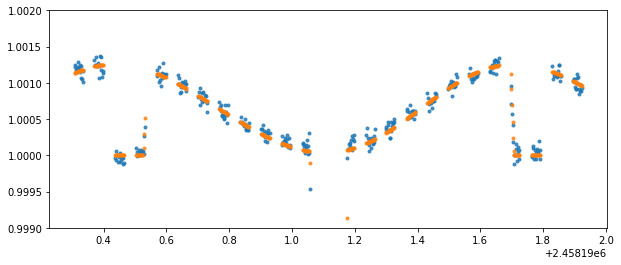

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(opt._observed.timelist[0], opt._observed.spectrum,'.', alpha=0.8)
plt.plot(lc_fit[0][0], lc_fit[1][0],'.', alpha=0.8)
plt.ylim(0.999, 1.002)
plt.show()

In [29]:
means = []
sigm = []
sigp = []
keys = []
for key, value in res['solution0']['fit_params'].items():
    print(key, '| mean: ', value['mean'], '| sig_m: ', value['sigma_m'], '| sig_p: ', value['sigma_p'])
    means.append(value['mean'])
    sigm.append(value['sigma_m'])
    sigp.append(value['sigma_p'])
    keys.append(key)

fact = 3
ranges = [[means[i] - 3*sigm[i], means[i] + 3*sigp[i]] for i in range(len(means))]

rp_rs2_w1 | mean:  0.014365814412791519 | sig_m:  1.639997854310793e-05 | sig_p:  1.5817118759451493e-05
c0_w1 | mean:  1.006723654138107e-05 | sig_m:  6.152594438902971e-06 | sig_p:  1.0821390590148399e-05
c1_w1 | mean:  0.001217557690945325 | sig_m:  1.6011877306997902e-05 | sig_p:  1.5526931065263814e-05
c2_w1 | mean:  -0.1413577217106435 | sig_m:  0.0566109061764275 | sig_p:  0.05798082604370035
ramps_expAF_vis0 | mean:  -0.0008278856628906528 | sig_m:  1.3868330880371493e-05 | sig_p:  1.2616832765644328e-05
ramps_expBF_vis0 | mean:  0.005019662653861343 | sig_m:  0.00016476539737185058 | sig_p:  0.0001910565146630216
ramps_linF_seg0 | mean:  0.004829348190548773 | sig_m:  0.0002525218982222695 | sig_p:  0.00025274108527831383
ramps_quadF_seg0 | mean:  -0.004390909161566513 | sig_m:  0.0003469468767174381 | sig_p:  0.00032421856750297195
log_ramps_normF_seg0 | mean:  0.00038072277159991493 | sig_m:  1.5390343091818736e-05 | sig_p:  1.5233672160527129e-05
ramps_linF_seg1 | mean:  0.

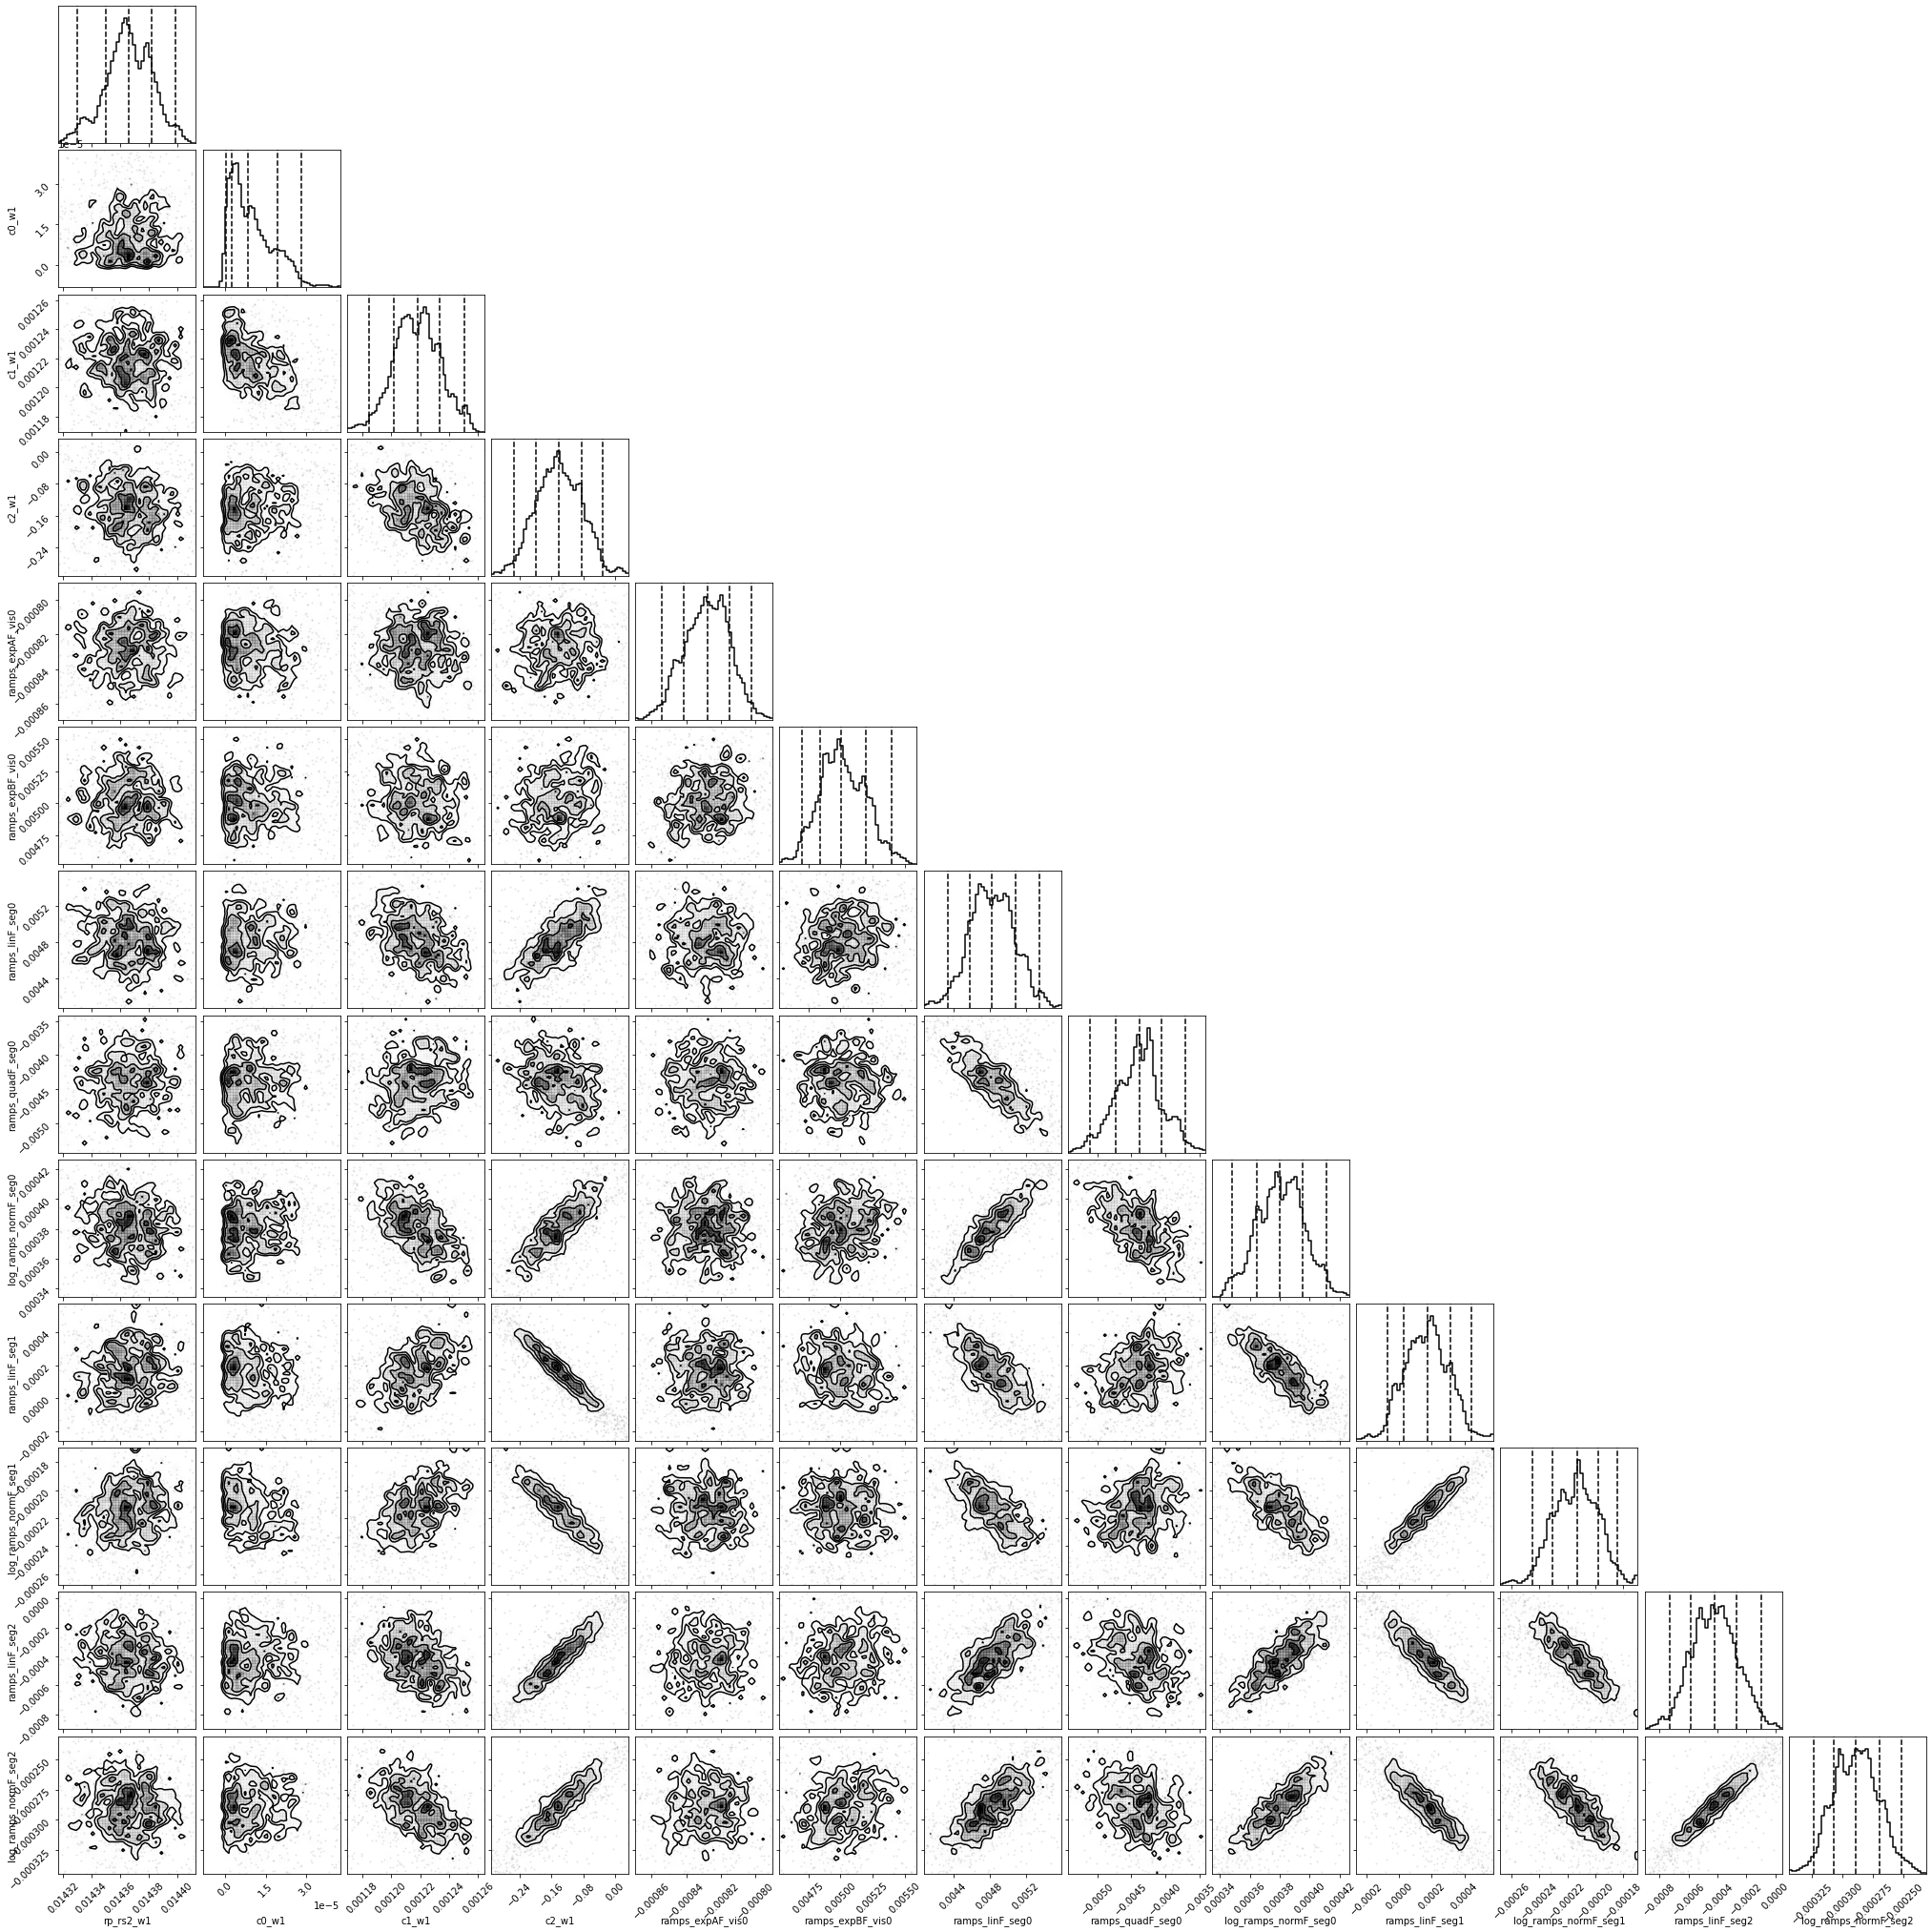

In [30]:
tr = res['solution0']['tracedata'][:]
we = res['solution0']['weights'][:]
from corner import corner
#ranges = None
fig = corner(tr, weights=we, bins=50, range=ranges, labels=keys, smooth=True, smooth1d=True, quantiles=[0.025,0.16,0.5,0.84,0.975])
plt.show()